# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [293]:
import pandas as pd
import numpy as np

arquivo = 'data/Orange_Telecom_Churn_Data.csv'

data = pd.read_csv(arquivo)

data = data.drop(['state', 'area_code', 'phone_number'], axis=1)

data[1:5]

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [294]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer 

scaler = MinMaxScaler()
lb = LabelBinarizer()

data['churned'] = data['churned'].map({True: 'yes', False: 'no'})    
bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']
for b in bin_cols:
    data[b] = lb.fit_transform(data[b])
    
headers = [c for c in data.columns.values if not c in bin_cols]
data[headers] = scaler.fit_transform(data[headers])
    
data[:5]

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0,1,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0
1,0.438017,0,1,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0
2,0.561983,0,0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0
3,0.342975,1,0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0
4,0.305785,1,0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0


## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [295]:
x_cols = [x for x in data.columns if x != 'churned']

x_data = data[x_cols]
y_data = data['churned']

In [296]:
from sklearn.neighbors import KNeighborsClassifier

knbc = KNeighborsClassifier(n_neighbors=3)

knbc.fit(x_data, y_data)
predicted_data = knbc.predict(x_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [297]:
def accuracy(real, predict):
    acompare = np.abs(np.subtract(real, predict))
    acc = 1 - np.sum(acompare) / np.size(real)
    return acc

accuracy(y_data, predicted_data)

0.94220000000000004

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [298]:
knbc_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')

knbc_distance.fit(x_data, y_data)
dt_predict_distance = knbc_distance.predict(x_data)

print('Acuracia usando weights=distance:')
print(accuracy(y_data, dt_predict_distance))

knbc_man = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)

knbc_man.fit(x_data, y_data)
dt_predict_man = knbc_man.predict(x_data)

print('Acuracia usando manhattan')
print(accuracy(y_data, dt_predict_man))

Acuracia usando weights=distance:
1.0
Acuracia usando manhattan
0.9456


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [300]:
from sklearn.metrics import accuracy_score


score_list = list()

'''escreva no bloco abaixo'''

for i in range(20):
    knbc_range = KNeighborsClassifier(n_neighbors=i+1)
    knbc_range.fit(x_data, y_data)
    predict_range = knbc_range.predict(x_data)
    score_list.append([i+1, accuracy(y_data, predict_range)])
    
'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df

,k,accuracy
0,1,1.0000
1,2,0.9292
2,3,0.9422
3,4,0.9154
4,5,0.9284
5,6,0.9156
6,7,0.9254
7,8,0.9122
8,9,0.9224
9,10,0.9092


In [301]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

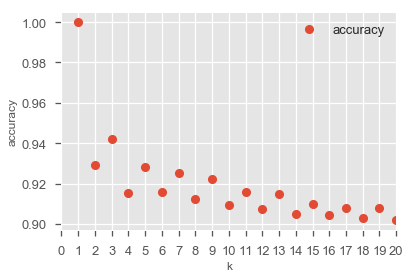

In [304]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.style.use('ggplot')


ax = score_df.set_index('k').plot(ls='', marker='o')

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(0, 21));